In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [2]:
!pip install cupy-cuda114

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 MB 12.0 MB/s eta 0:00:00


In [3]:
!pip install psutil
!pip install gpustat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.5 MB/s eta 0:00:00
  Created wheel for gpustat: filename=gpustat-1.1-py3-none-any.whl size=26280 sha256=9d3c6491f0c1fe6b364cf42e6e326914e2ff97d441ef730799ab51ae5dbdd9cc
  Stored in directory: /root/.cache/pip/wheels/ee/d0/2c/1e02440645c2318ba03aea99993a44a9108dc8f74de0bd370b
Successfully built gpustat


In [4]:
import numpy as np
import cupy as cp
import psutil
import time
import gpustat

In [13]:
# Define the matrix sizes
matrix_sizes = [100, 500, 1000, 2000, 3000]

In [14]:
# CPU Matrix Multiplication
def cpu_matrix_multiplication(matrix_a, matrix_b):
    start_time = time.time()

    # Perform matrix multiplication using CPU
    cpu_result = np.dot(matrix_a, matrix_b)

    end_time = time.time()
    execution_time = end_time - start_time
    return cpu_result, execution_time

In [15]:
# GPU Matrix Multiplication
def gpu_matrix_multiplication(matrix_a, matrix_b):
    start_time = time.time()

    # Perform matrix multiplication using GPU
    gpu_matrix_a = cp.asarray(matrix_a)
    gpu_matrix_b = cp.asarray(matrix_b)
    gpu_result = cp.dot(gpu_matrix_a, gpu_matrix_b)
    cpu_result = cp.asnumpy(gpu_result)

    end_time = time.time()
    execution_time = end_time - start_time
    return cpu_result, execution_time

In [16]:
cpu_times = []
gpu_times = []

for matrix_size in matrix_sizes:
    print(f'matrix_size = {matrix_sizes}:')
    # Get the overall CPU percent
    cpu_percent = psutil.cpu_percent()

    # Get per-core CPU percent
    cpu_percent_per_core = psutil.cpu_percent(percpu=True)

    print(f'Overall CPU usage: {cpu_percent}%')
    print(f'Per-core CPU usage: {cpu_percent_per_core}%')

    # Get the overall GPU percent
    stats = gpustat.new_query()
    print(stats)

    matrix_a = np.random.rand(matrix_size, matrix_size)
    matrix_b = np.random.rand(matrix_size, matrix_size)

    # Run CPU Matrix Multiplication
    cpu_result, cpu_execution_time = cpu_matrix_multiplication(matrix_a, matrix_b)
    cpu_times.append(cpu_execution_time)

    # Run GPU Matrix Multiplication
    gpu_result, gpu_execution_time = gpu_matrix_multiplication(matrix_a, matrix_b)
    gpu_times.append(gpu_execution_time)

    # Compare the results (optional)
    print("CPU Result:")
    print(cpu_result)
    print("GPU Result:")
    print(gpu_result)

    # Print the execution times
    print("CPU Execution Time:", cpu_execution_time, "seconds")
    print("GPU Execution Time:", gpu_execution_time, "seconds")
    print("----------------------------------------------------")


matrix_size = [100, 500, 1000, 2000, 3000]:
Overall CPU usage: 16.5%
Per-core CPU usage: [15.9, 17.1]%
GPUStatCollection(host=d6537d5522b1, [
  [0] Tesla T4         | 71°C,   0 % |   347 / 15360 MB |
])
CPU Result:
[[26.92825658 26.74674378 27.65136427 ... 27.01985846 27.89798647
  23.57032429]
 [26.09319453 24.15680855 23.5788951  ... 25.91219067 25.99969676
  22.88476996]
 [25.21800383 24.95094642 24.58423284 ... 25.17083122 24.6913118
  21.56657106]
 ...
 [29.18025412 28.02098722 26.25027999 ... 27.70768793 27.00909255
  24.34604391]
 [23.75382177 23.96818448 23.54117232 ... 24.64983643 23.40399775
  21.28249136]
 [26.13997215 23.63085379 24.18058169 ... 27.90310517 25.84139426
  23.35249336]]
GPU Result:
[[26.92825658 26.74674378 27.65136427 ... 27.01985846 27.89798647
  23.57032429]
 [26.09319453 24.15680855 23.5788951  ... 25.91219067 25.99969676
  22.88476996]
 [25.21800383 24.95094642 24.58423284 ... 25.17083122 24.6913118
  21.56657106]
 ...
 [29.18025412 28.02098722 26.250279

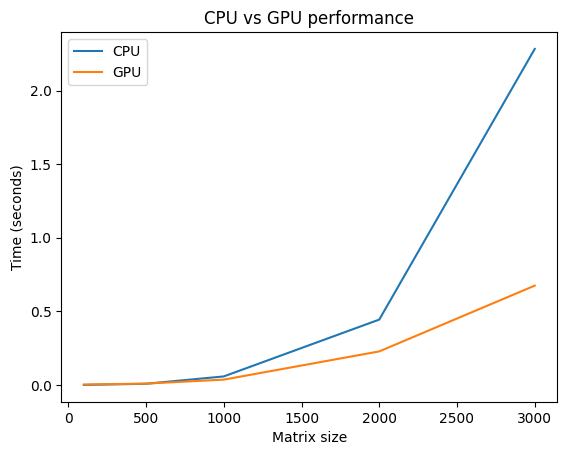

In [17]:
import matplotlib.pyplot as plt

# Plotting
plt.plot(matrix_sizes, cpu_times, label='CPU')
plt.plot(matrix_sizes, gpu_times, label='GPU')
plt.xlabel('Matrix size')
plt.ylabel('Time (seconds)')
plt.title('CPU vs GPU performance')
plt.legend()
plt.show()